In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('dados/AirPassengers.csv',
                  parse_dates=['Month'],
                  index_col='Month',
                  date_parser=dateparse
                )
base.head()

C:\Users\Helio Junior\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
ts = base['#Passengers']

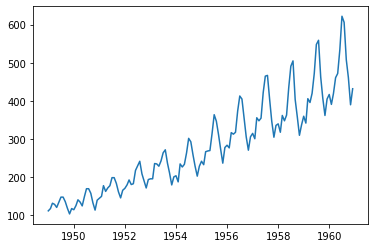

In [4]:
plt.plot(ts)

In [5]:
# p = N auto regressivos
# q = media movel
# d = diferença nao sazionais
model = ARIMA(ts, order=(2,1,2))
model_trained = model.fit()

C:\Users\Helio Junior\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Helio Junior\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [6]:
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.711
Date:                Tue, 31 Mar 2020   AIC                           1344.043
Time:                        11:15:03   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5312      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.523      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9999      0.068     14.807      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [7]:
previsoes = model_trained.forecast(steps=12)[0]

In [8]:
print(previsoes)

[433.10443805 450.85992583 479.77394432 511.93163069 539.28641302
 555.77757633 558.73631406 549.27679226 531.66185176 511.90223092
 496.02530936 488.49635091]


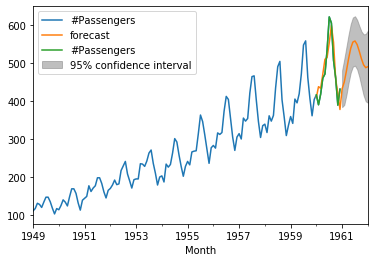

In [13]:
eixo = ts.plot()
model_trained.plot_predict('1960-1-1',
                           '1962-1-1',
                           ax=eixo,
                           plot_insample=True
                          );